## Regularization Linear Model - Ridge, Lasso, Elasticnet

### Introduction to Regularization Linaer Model

Without regulariztion, linear regression only focus on minimizing RSS(Difference between prediction and actual data)  
This cause overfitting to training data and make coefficients explosion easily.(Poor prediction with test data)  
We need balance between minimizing RSS and regularization of coefficients.  
-  Objective Cost Function = Min(Rss + alpha*||W||^2), alpha: Tuning Parameter to control size of coefficients.  
If alpha is small, there will less differnce compare to non-regularization model.  
If alpha is big, W should be small to achieve minimize of cost function.  
1. L2 Regularization: use alpha*||W||^2 for coefficient regularization  
2. L1 Regularization: use alpha*||W|| for coefficient regularization

### Ridge Regression

Parameter: alpha  
- alpha[Default=1]: L2 Regularization Coefficeint

In [12]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boston = load_boston()
X_features = pd.DataFrame(boston.data, columns=boston.feature_names)
y_target= pd.Series(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
mse_scores = -1 * neg_mse_scores
avg_mse = np.mean(mse_scores)

rmse_scores  = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

print('MSE Scores for each 5 folds: ', np.round(mse_scores, 4))
print('Mean of MSE Scores: {0:.4f} '.format(avg_mse))

print('RMSE Scores for each 5 folds: ', np.round(rmse_scores, 4))
print('Mean of RMSE Scores: {0:.4f} '.format(avg_rmse))

MSE Scores for each 5 folds:  [11.4218 24.2945 28.1436 74.5992 28.5171]
Mean of MSE Scores: 33.3952 
RMSE Scores for each 5 folds:  [3.3796 4.9289 5.305  8.6371 5.3401]
Mean of RMSE Scores: 5.5182 


In [14]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
    mse_scores = -1 * neg_mse_scores
    rmse_scores  = np.sqrt(mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print('Mean of RMSE Scores with alpha={}: {:.4f}'.format(alpha, avg_rmse))

Mean of RMSE Scores with alpha=0: 5.8287
Mean of RMSE Scores with alpha=0.1: 5.7885
Mean of RMSE Scores with alpha=1: 5.6526
Mean of RMSE Scores with alpha=10: 5.5182
Mean of RMSE Scores with alpha=100: 5.3296


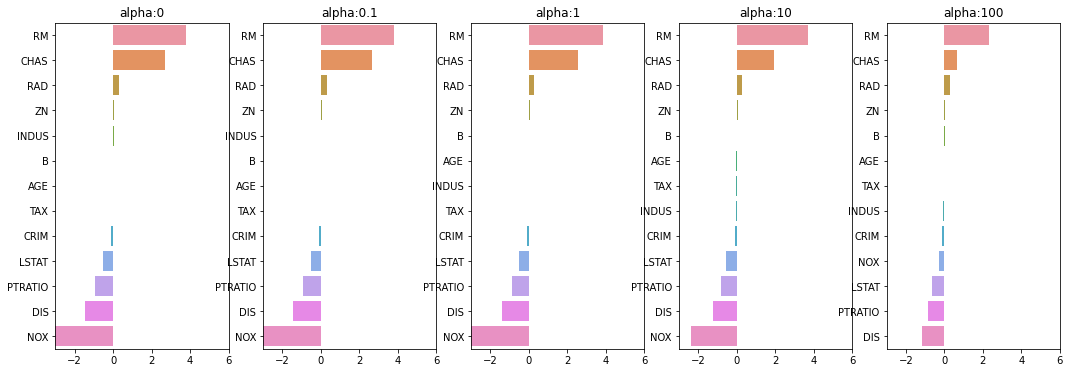

In [15]:
# Make 5col subplots 
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
 
coeff_df = pd.DataFrame()

#pos is used for designeate position on subplot
for pos, alpha in enumerate(alphas):    
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_features , y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_features.columns)   # make coef pd.Series for each features. 
    colname='alpha:'+str(alpha) # make col_name
    coeff_df[colname] = coeff   # add series to Df
    
    coeff = coeff.sort_values(ascending=False)  # Sort values in series by decending order
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

### Lasso Regression

Lasso Regression: Linear Regression that Applied L1 Regularization  
Difference compare to Ridge Regression: L2 regularization reduces 'size' of coefficients,  
but L1 regularization dramatically reduce(to 0) unusual coefficients  
Hence, Lasso Regression can use as feature selection  
Parameter: alpha  
- alpha[Default=1]: L1 Regulaization Coefficient

In [41]:
from sklearn.linear_model import Lasso, ElasticNet

# Print avg_RMSE of regression model by alpha values
# and transform coefficients for each features to DF by alpha values
def get_linear_reg_eval_plots(model_name, alphas=None, X_features=None, y_target=None, verbose=True):
    coeff_df = pd.DataFrame()
    fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

    if verbose : print('####### ', model_name , '#######')
    for pos, alpha in enumerate(alphas):
        if model_name =='Ridge': 
            model = Ridge(alpha=alpha)
        elif model_name =='Lasso': 
            model = Lasso(alpha=alpha)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('Mean of RMSE Scores with alpha={}: {:.4f}'.format(alpha, avg_rmse))
        
        # Coefficients DF
        model.fit(X_features , y_target)
        coeff = pd.Series(data=model.coef_ , index=X_features.columns)
        colname='alpha:'+str(alpha)
        coeff_df[colname] = coeff

        # Print Subplots
        coeff = coeff.sort_values(ascending=False)  # Sort values in series by decending order
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3,6)
        sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
  
    print(coeff_df)     
    plt.show()
    return coeff_df

#######  Lasso #######
Mean of RMSE Scores with alpha=0.07: 5.6123
Mean of RMSE Scores with alpha=0.1: 5.6151
Mean of RMSE Scores with alpha=0.5: 5.6691
Mean of RMSE Scores with alpha=1: 5.7760
Mean of RMSE Scores with alpha=3: 6.1888
         alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
RM         3.789725   3.703202   2.498212  0.949811  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
B          0.010248  

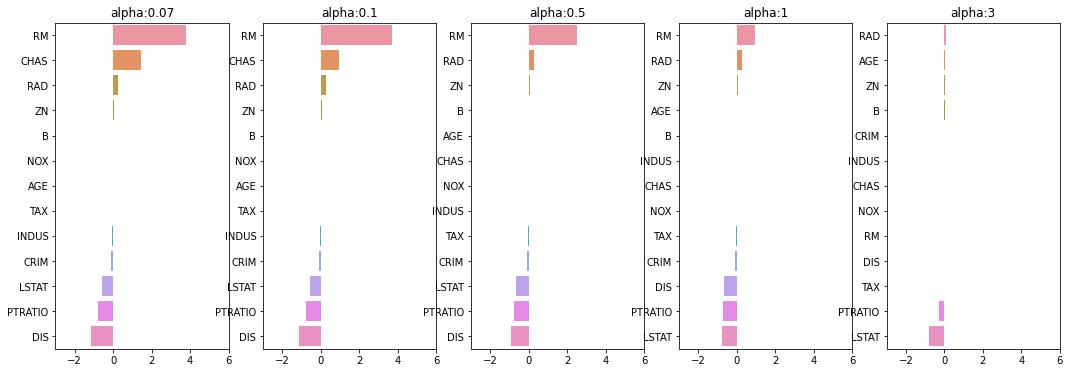

In [42]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval_plots('Lasso', alphas=lasso_alphas, X_features=X_features, y_target=y_target)

### ElasticNet Regression

ElasticNet: Regression that combined L1&L2 Regularization  
Cost Func. = min(RSS + alpha2*||W||^2 + alpha1*||W||)  
Lasso Regression tends to select single important feature among features that have correlation and delete(make coefficient=0) other features.  
To ease Lasso's extreme chac., ElasticNet added L2 Regularization to Lasso.  
Parameters: alpha, l1_ratio  
- alpha: sum of alpha1(L1 alpha), alpha2(L2 alpha)  
- l1_ratio: alpha1/(alpha1+alpha2)  

#######  ElasticNet #######
Mean of RMSE Scores with alpha=0.07: 5.5417
Mean of RMSE Scores with alpha=0.1: 5.5259
Mean of RMSE Scores with alpha=0.5: 5.4667
Mean of RMSE Scores with alpha=1: 5.5969
Mean of RMSE Scores with alpha=3: 6.0681
         alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
RM         3.574162   3.414154   1.918419  0.938789  0.000000
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
B          0.010

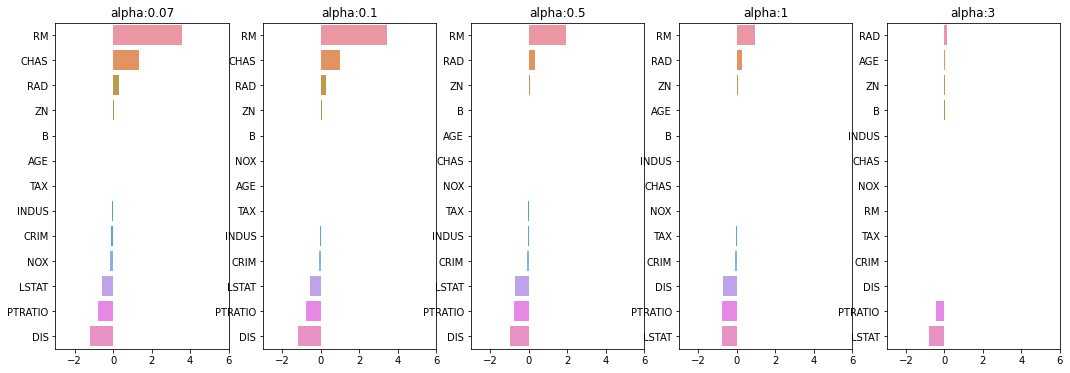

In [43]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval_plots('ElasticNet', alphas=elastic_alphas, X_features=X_features, y_target=y_target)

### Data Transform for Linear Regression Model

Linear Regression highly prefer normalized feature values and target values.  
Especially if target values' dist. is not normal dist. but skewed shaped dist., it will cause bad effect to prediction performance.  
So generally, before applying to model, we use scaling/normalization to data.  
However, scaling/normalization does not assure improvement of prediction performance.  

3 type of data transformation in Sklearn module  
1. Use StandardScaler class or MinMaxScaler class  
2. After scaling/normalization, apply polynomial properties again.(Use when method 1 does not improve prediction)  
3. Log Transformation: Apply log function.

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # apply np.log can cause underflow, so we use 1+log() which is np.log1p
        scaled_data = np.log1p(input_data) 
    else:
        scaled_data = input_data

    if p_degree != None:
        # Caution! p_degree should less than 3
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False)\
                                        .fit_transform(scaled_data)
    return scaled_data

In [66]:
def get_linear_reg_eval(model_name, alphas=None, X_features=None, y_target=None, verbose=True):
    rmse_list = []
    if verbose : print('####### ', model_name , '#######')
    for pos, alpha in enumerate(alphas):
        if model_name =='Ridge': 
            model = Ridge(alpha=alpha)
        elif model_name =='Lasso': 
            model = Lasso(alpha=alpha)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        rmse_list.append(avg_rmse)
    rmse_series = pd.Series(rmse_list)
    return rmse_series

In [71]:
alphas = [0.1, 0.5, 1, 5, 10]
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
rmse_df = pd.DataFrame()
for scale_method in scale_methods:
    X_features_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                        input_data=X_features)
    rmse_df[scale_method] = get_linear_reg_eval('Ridge', alphas=alphas, X_features=X_features_scaled, 
                                              y_target=y_target, verbose=False)
rmse_df.insert(loc=0, column='alphas', value=alphas) 
rmse_df

,alphas,"(None, None)","(Standard, None)","(Standard, 2)","(MinMax, None)","(MinMax, 2)","(Log, None)"
0,0.1,5.788487,5.825993,8.827236,5.763570,5.297560,4.770430
1,0.5,5.700420,5.815530,7.507290,5.584503,4.366122,4.697036
2,1.0,5.652571,5.802890,6.871288,5.465045,4.322660,4.676227
3,5.0,5.561517,5.716670,5.888662,5.456890,4.907496,4.729088
4,10.0,5.518166,5.636831,5.484870,5.754164,5.185204,4.836440
